# Lesson_2_HW

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [51]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

%matplotlib inline

In [52]:
datar,target = make_regression(1000,2)

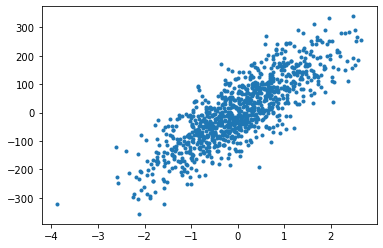

In [53]:
plt.plot(datar[:,0],target,'.')
plt.show()

In [54]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [107]:
eta_list = [0.2/(5**i) for i in range(5)]

np.random.seed(1234)
errors_gd = {}
max_iter = 1e4
min_weight_dist = 1e-8
for eta in eta_list:
    errors_gd[f'eta_{eta}'] = []
    w = np.random.randn(2)
    w_list = [w.copy()]
    weight_dist = np.inf
    iter_num = 0

    while weight_dist > min_weight_dist and iter_num < max_iter:

        new_w = w - eta * (1/datar.shape[0] * 2 * np.dot(datar.T, np.dot(datar, w) - target))

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors_gd[f'eta_{eta}'].append(mserror(datar, new_w, target))
        iter_num += 1
        w = new_w

    w_list = np.array(w_list)

    print(w)

[99.5879709  66.32183089]
[99.58797081 66.32183085]
[99.58797031 66.32183064]
[99.58796786 66.32182956]
[99.32327827 66.17371475]


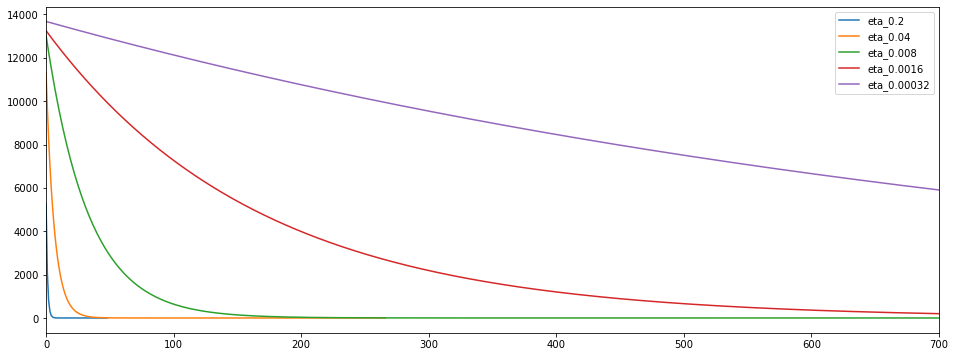

In [109]:
plt.figure(figsize=(16, 6))
plt.xlim(0, 700)
for k, v in errors_gd.items():
    plt.plot(errors_gd[k], label = str(k))
plt.legend()
plt.show()

In [122]:
w = np.random.randn(2)
w_list = [w.copy()]
errors_gd = []
eta = 0.2
max_iter = 1e4
min_weight_dist = 1e-8
weight_dist = np.inf
iter_num = 0
np.random.seed(1234)

while weight_dist > min_weight_dist and iter_num < max_iter:

    new_w = w - eta * (1/datar.shape[0] * 2 * np.dot(datar.T, np.dot(datar, w) - target))

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors_gd.append(mserror(datar, new_w, target))
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(w)

[99.5879709  66.32183089]


In [100]:
eta_list = [0.02/(5**i) for i in range(5)]

lamb_list = [0.1/(5**i) for i in range(5)]

np.random.seed(1234)
errors_gds = {}
max_iter = 1e4
min_weight_dist = 1e-8
for eta in eta_list:
    for lamb in lamb_list:
        errors_gds[f'eta_{eta}_lamb_{lamb}'] = []
        w = np.random.randn(2) # Это частный случай
        w_list = [w.copy()]
        weight_dist = np.inf
        iter_num = 0
        Q = [mserror(datar, w, target)]  
        
        while weight_dist > min_weight_dist and iter_num < max_iter:

            train_ind = np.random.randint(datar.shape[0])
            new_w = w - 2 * eta/(0+1) * np.dot(datar[train_ind].T, (np.dot(datar[train_ind], w) - target[train_ind]))

            weight_dist = np.linalg.norm(new_w - w, ord=2)

            w_list.append(new_w.copy())
            errors_gds[f'eta_{eta}_lamb_{lamb}'].append(mserror(datar, new_w, target))
            Q.append(Q[-1]*(1-lamb)+lamb*(np.dot(datar[train_ind], w) - target[train_ind])**2)
            iter_num += 1
            w = new_w

        w_list = np.array(w_list)

        print(w)

[99.5877927  66.32180476]
[99.58759635 66.32158456]
[99.58795167 66.32178445]
[99.58787849 66.3217817 ]
[99.58794603 66.32182432]
[99.58774332 66.32174858]
[99.58611704 66.32055369]
[99.58785141 66.32175895]
[99.5877459 66.3216786]
[99.58786998 66.3218083 ]
[99.5811985  66.31862227]
[99.5827541  66.31839263]
[99.58122642 66.31765849]
[99.56884096 66.31271202]
[99.58603198 66.32108015]
[94.3504441  63.18318068]
[94.27069781 63.04237664]
[94.47308475 63.22411887]
[94.63132832 63.28363131]
[94.37051614 63.58402633]
[44.54067028 30.43531752]
[43.21358816 30.25377544]
[43.55331747 30.61711168]
[44.54990868 30.27180384]
[44.5668509  29.94728674]


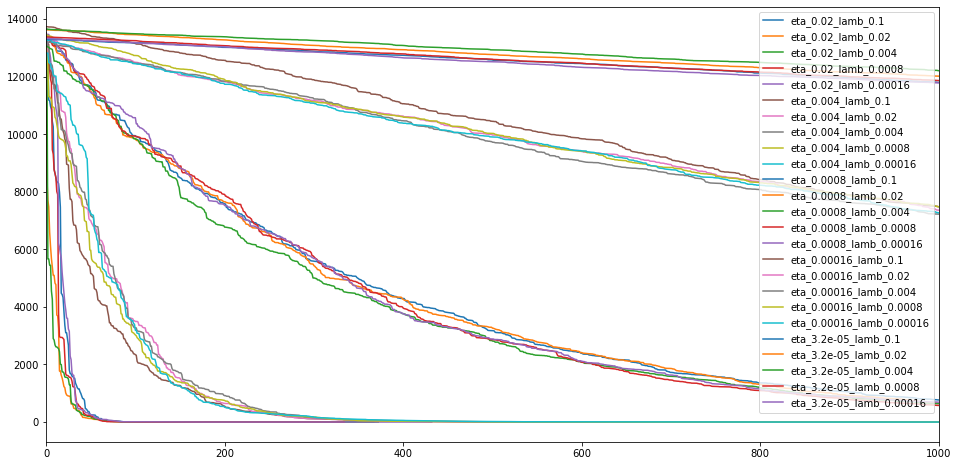

In [101]:
plt.figure(figsize=(16, 8))
plt.xlim(0, 1000)
for k, v in errors_gds.items():
    plt.plot(errors_gds[k], label = str(k))
plt.legend()
plt.show()

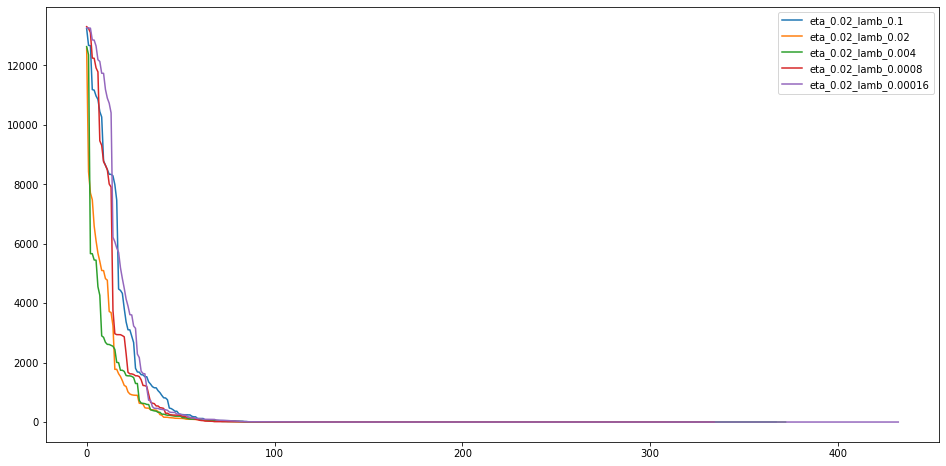

In [102]:
plt.figure(figsize=(16, 8))
plt.plot(errors_gds['eta_0.02_lamb_0.1'], label = 'eta_0.02_lamb_0.1')
plt.plot(errors_gds['eta_0.02_lamb_0.02'], label = 'eta_0.02_lamb_0.02')
plt.plot(errors_gds['eta_0.02_lamb_0.004'], label = 'eta_0.02_lamb_0.004')
plt.plot(errors_gds['eta_0.02_lamb_0.0008'], label = 'eta_0.02_lamb_0.0008')
plt.plot(errors_gds['eta_0.02_lamb_0.00016'], label = 'eta_0.02_lamb_0.00016')
plt.legend()
plt.show()

In [103]:
w = np.random.randn(2)
w_list = [w.copy()]
errors_gds = []
eta = 0.02
max_iter = 1e4
min_weight_dist = 1e-8
weight_dist = np.inf
iter_num = 0
lamb = 0.02 
np.random.seed(1234)

Q = [mserror(datar, w, target)]  

while weight_dist > min_weight_dist and iter_num < max_iter:
    
    train_ind = np.random.randint(datar.shape[0])
    
    new_w = w - 2 * eta/(0+1) * np.dot(datar[train_ind].T, (np.dot(datar[train_ind], w) - target[train_ind]))
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors_gds.append(mserror(datar, new_w, target))
    Q.append(Q[-1]*(1-lamb)+lamb*(np.dot(datar[train_ind], w) - target[train_ind])**2)
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(w)

[99.58778001 66.32180247]


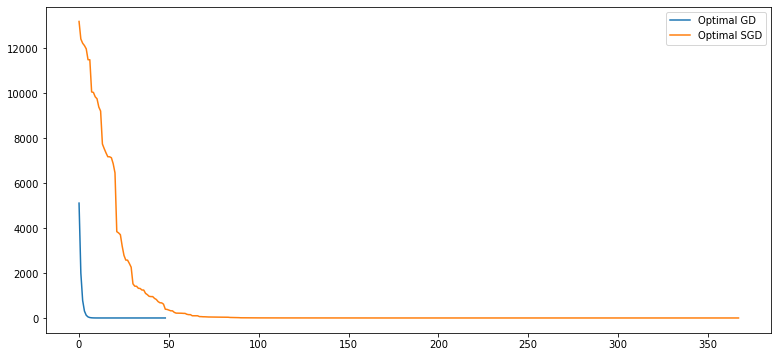

In [104]:
plt.figure(figsize=(13, 6))
plt.plot(errors_gd, label = 'Optimal GD')
plt.plot(errors_gds, label = 'Optimal SGD')
plt.legend()
plt.show()

In [105]:
len(errors_gd), len(errors_gds)

(49, 368)

Как видно из графиков, модель с обычным градиентным спуском сходится примерно в 7 раз быстрее модели с использованием стохатического спуска по количеству итераций. Однако, взяв всего один экземпляр в модели с SGD, мы производим почти в 1000 раз менее затратные высисления, что несомненно лучше с точки зрения экономии ресурсов.

2. Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE добавить норму весов, а в поправку нужно добавить производную для нормы вектора весов по весам) и сравнить результаты.

In [171]:
lambda_l2_list = [0.3/(5*i) for i in range(1, 6)]

errors_gd_l2 = {}
eta = 0.2
max_iter = 1e4
min_weight_dist = 1e-8
np.random.seed(1234)

for lambda_l2 in lambda_l2_list:
    w = np.random.randn(2)
    w_list = [w.copy()]
    weight_dist = np.inf
    iter_num = 0
    errors_gd_l2[f'{lambda_l2}'] = []
    
    while weight_dist > min_weight_dist and iter_num < max_iter:

    #     new_w = w - eta * (1/datar.shape[0] * 2 * np.dot(datar.T, np.dot(datar, w) - target))

        new_w = w - eta * (1 / datar.shape[0] * 2 * np.dot(datar.T, np.dot(datar, w) - target)) - lambda_l2 * 2 * eta * w \
        # добавим коэфф. лямбда для расчёта 

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors_gd_l2[f'{lambda_l2}'].append(mse_L2(datar, new_w, target, lambda_l2))
        iter_num += 1
        w = new_w

    w_list = np.array(w_list)

    print(w)

[93.52632466 62.42129962]
[96.46206008 64.31240828]
[97.4820069  64.96853208]
[98.00010755 65.30164626]
[98.31361853 65.5031615 ]


In [172]:
lambda_l2_list = [0.3/(5*i) for i in range(1, 6)]


errors_gds_l2 = {}
eta = 0.02
max_iter = 1e4
min_weight_dist = 1e-8
lamb = 0.02 
np.random.seed(1234)

for lambda_l2 in lambda_l2_list:
    w = np.random.randn(2)
    w_list = [w.copy()]
    weight_dist = np.inf
    iter_num = 0
    Q = [mse_L2(datar, w, target, lambda_l2)]  
    errors_gds_l2[f'{lambda_l2}'] = []
    
    while weight_dist > min_weight_dist and iter_num < max_iter:

        train_ind = np.random.randint(datar.shape[0])

        new_w = w - 2 * eta/(0+1) * np.dot(datar[train_ind].T, (np.dot(datar[train_ind], w) - target[train_ind]))  - lambda_l2 * 2 * eta * w \
    # добавим коэфф. лямбда для расчёта 

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors_gds_l2[f'{lambda_l2}'].append(mse_L2(datar, new_w, target, lambda_l2))
        Q.append(Q[-1]*(1-lamb)+lamb*(np.dot(datar[train_ind], w) - target[train_ind])**2)

        iter_num += 1
        w = new_w

    w_list = np.array(w_list)

    print(w)

[94.22237649 64.36804615]
[95.86132646 63.64480175]
[97.1445707  64.54797595]
[98.12257206 65.37819505]
[98.92095437 65.89580062]


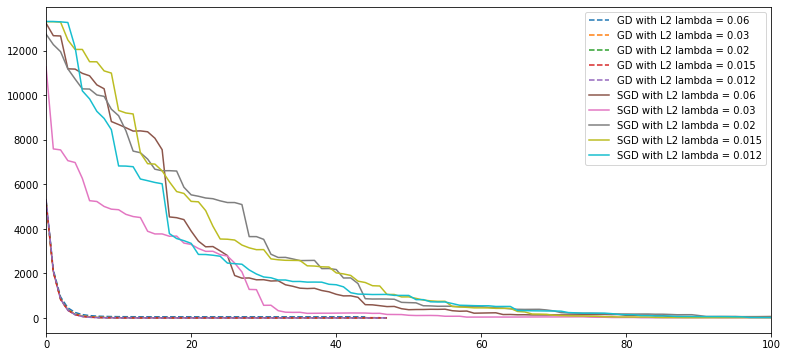

In [177]:
plt.figure(figsize=(13, 6))
plt.xlim(0, 100)
for k, v in errors_gd_l2.items():
    plt.plot(errors_gd_l2[k], linestyle = '--', label = str(f'GD with L2 lambda = {k}'))
for k, v in errors_gds_l2.items():
    plt.plot(errors_gds_l2[k], label = str(f'SGD with L2 lambda = {k}'))
plt.legend()
plt.show()

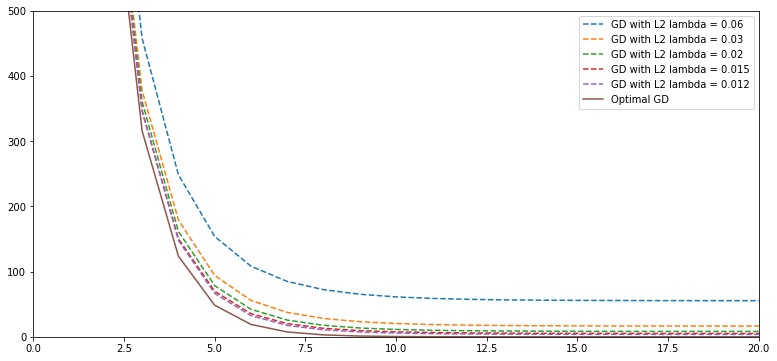

In [190]:
plt.figure(figsize=(13, 6))
plt.xlim(0, 20)
plt.ylim(0, 500)
for k, v in errors_gd_l2.items():
    plt.plot(errors_gd_l2[k], linestyle = '--', label = str(f'GD with L2 lambda = {k}'))
plt.plot(errors_gd, label = 'Optimal GD')
plt.legend()
plt.show()

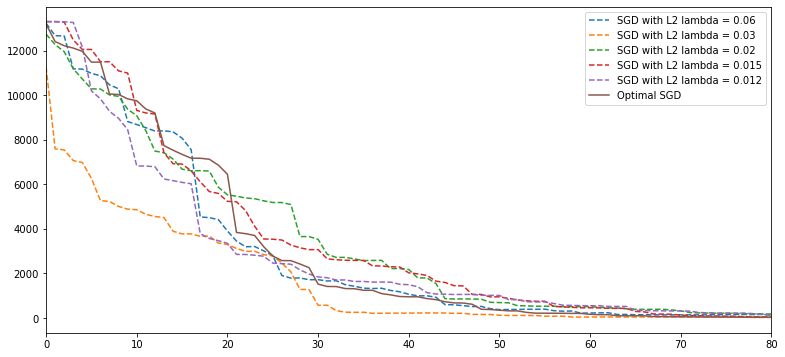

In [185]:
plt.figure(figsize=(13, 6))
plt.xlim(0, 80)
for k, v in errors_gd_l2.items():
    plt.plot(errors_gds_l2[k], linestyle = '--', label = str(f'SGD with L2 lambda = {k}'))
plt.plot(errors_gds, label = 'Optimal SGD')
plt.legend()
plt.show()